In [ ]:
import zipfile
import requests


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
classes = ['buttercup', 'coreopsis', 'daffodil', 'dandelion', 'sunflower']

for class_name in classes:
  with open(class_name+'.zip', 'wb') as fh:
    fh.write(
        requests.get(f'https://github.com/ASNikurashin/CV2023_lab3/raw/main/datasets/{class_name}.zip').content)

In [ ]:
for class_name in classes:
  with zipfile.ZipFile(class_name+'.zip') as zf:
    zf.extractall('./')

In [ ]:
! mkdir root_dataset

In [ ]:
! mv buttercup ./root_dataset
! mv coreopsis ./root_dataset
! mv daffodil ./root_dataset
! mv dandelion ./root_dataset
! mv sunflower ./root_dataset

In [ ]:
! rm -rf ./root_dataset/daffodil/__MACOSX

In [ ]:
transforms = transforms.Compose(
    [   transforms.Resize((224,224)),
        transforms.ToTensor(),
     ])

In [ ]:
batch_size = 16

In [ ]:
dataset = torchvision.datasets.ImageFolder('./root_dataset/', transforms)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 4263
    Root location: ./root_dataset/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [ ]:
dataset.classes

['buttercup', 'coreopsis', 'daffodil', 'dandelion', 'sunflower']

In [ ]:
trainset, testset = torch.utils.data.random_split(dataset, [0.7, 0.3])

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

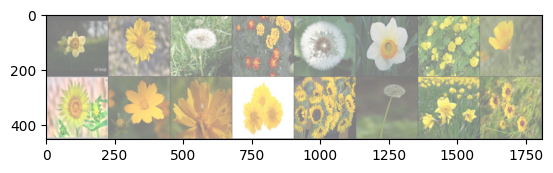

daffodil coreopsis dandelion coreopsis dandelion daffodil buttercup buttercup sunflower coreopsis coreopsis coreopsis sunflower dandelion daffodil coreopsis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(44944, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
net = net.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # print(inputs.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.032
[1,    51] loss: 1.610
[1,   101] loss: 1.595
[1,   151] loss: 1.582
[2,     1] loss: 0.031
[2,    51] loss: 1.459
[2,   101] loss: 1.304
[2,   151] loss: 1.198
[3,     1] loss: 0.026
[3,    51] loss: 1.081
[3,   101] loss: 1.123
[3,   151] loss: 1.126
[4,     1] loss: 0.018
[4,    51] loss: 1.086
[4,   101] loss: 1.049
[4,   151] loss: 1.023
[5,     1] loss: 0.026
[5,    51] loss: 0.954
[5,   101] loss: 0.983
[5,   151] loss: 1.105
[6,     1] loss: 0.024
[6,    51] loss: 0.984
[6,   101] loss: 0.940
[6,   151] loss: 0.942
[7,     1] loss: 0.019
[7,    51] loss: 0.913
[7,   101] loss: 0.948
[7,   151] loss: 0.906
[8,     1] loss: 0.012
[8,    51] loss: 0.907
[8,   101] loss: 0.879
[8,   151] loss: 0.865
[9,     1] loss: 0.011
[9,    51] loss: 0.829
[9,   101] loss: 0.874
[9,   151] loss: 0.819
[10,     1] loss: 0.017
[10,    51] loss: 0.755
[10,   101] loss: 0.704
[10,   151] loss: 0.814
[11,     1] loss: 0.014
[11,    51] loss: 0.688
[11,   101] loss: 0.768
[11,

In [ ]:
PATH = './cv3_net_ht.pth'
torch.save(net.state_dict(), PATH)

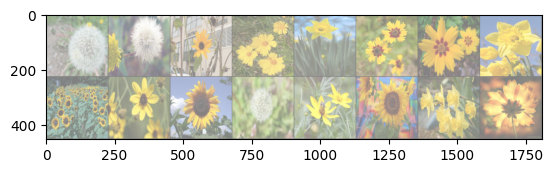

GroundTruth:  dandelion dandelion sunflower coreopsis


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dandelion dandelion sunflower buttercup


In [ ]:
predicted_all = []
true_all = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        true_all.extend(labels)
        predicted_all.extend(predicted)

In [ ]:
from sklearn.metrics import classification_report

classification_report(true_all, predicted_all,
                      target_names=['buttercup', 'coreopsis', 'daffodil', 'dandelion', 'sunflower'],
                      output_dict=True)['macro avg']['f1-score']

0.7035856075082811